## 📌Step1. 어떤 데이터가 주어졌는지 알아보기

- 머신러닝, 데이터 분석 등을 위한 체크리스트는 다음과 같습니다

- 데이터 전처리(Data Preprocessing)
    - data -> model -> insight
    - data preprocessing: data = raw data(날 것), clean, processing
    - data -> model: model(컴퓨터): 숫자가 비어있으면 안된다! 

🛳 titanic_dataset 을 보겠습니다.  
> 🔍 데이터의 일부분을 보고 다음 질문들에 답변해보세요
- 어떤 feature 들이 주어졌나요? -> column이 있는지 없는지
- 각 feature 가 의미하는 바는 무엇인가요? -> column이 어떤 의미를 갖는지
- train set, test set 이 따로 주어졌나요? 
- 어떤 feature 가 categorical 이고 어떤 feature 가 numerical 인가요?
    - feature가 범주형, 수치형

In [1]:
import seaborn as sns
import pandas as pd
# 이러한 방법도 있어요~!! pandas와 데이터셋의 주소를 활용하여 가져오는 방법!
# titanic = sns.load_dataset('raw/titanic') # 앞서 사용한 내장 데이터셋 사용 방법
# titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/raw/titanic.csv') 

titanic = pd.read_csv('titanic.csv')
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 어떤 feature 를 가지고 있나요?

데이터셋의 feature 는 몇 개인지, 이름은 무엇인지 알아야 분석을 하고 처리를 할 수 있습니다.

In [2]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [3]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 각 feature 가 의미하는 바는 무엇인가요?

🙄🙄sibsp? parch? 등의 이런 feature 들은 직관적으로 어떤 의미를 갖고 있는지 파악하기 힘듭니다.  

name 은 이름이라는 걸 바로 알 수 있지만, 첫 번째 줄의 Braund, Mr. Owen Harris  보면 이름이 두 개인 것처럼 보이고 헷갈립니다.  

**따.라.서!!** 데이터를 볼 때, 데이터의 출처를 확인하여 각 feature 가 의미하는 바는 무엇인지 파악할 필요가 있습니다.  

캐글 - 데이터 분석 챌린지 사이트에서 확인해 봅시다.  
Go to kaggle  👉👉 https://www.kaggle.com/c/titanic/data

<img src = "https://subinium.github.io/assets/images/category/kaggle.png" width = "800">



#### 데이터 형태 복습하기

각 feature 의 데이터 형태를 아는 것이 시각화할 때 어떤 Plot을 선택해야 하는지 도움을 줍니다.

> 📊Categorical(범주형) 인가요?  
- 🍊🍎🍇Nominal : survived, sex, embarked  
- 🥇🥈🥉ordinal : pclass  

> 📈Numerical(수치형) 인가요? 
- 👆✌🤟Discret : sibsp, parch
- 📏📐🧭Continuous : age, fare

또한 데이터에 문자와 숫자가 혼합되어 사용되고 있습니다. 

**문자 부분은 Categorical 이면서 숫자 부분은 Numerical 한 특징도 동시에** 있습니다.  

이럴 경우 **전처리**가 필요합니다.

#### 비어있거나 (NaN) 틀린 값이 있는 feature 가 있나요?

기계학습 모델에서 비어있는 값은 인식이 되지 않습니다.  
데이터의 특성에 따라, 의도하는 방향에 따라 여러 처리 방법이 있지만

 통상적으로 다음과 같은 방법을 이용합니다. 

1. 0 값으로 대체 (numerical의 경우) , "empty" "null" 등의 값으로 대체 (categorical 경우)

2. 중간값으로 대체 (numerical의 경우) , 가장 많이 등장하는 category 로 대체 (categorical의 경우) 

3.  작은 수의 경우, 해당 instance 를 삭제하여 사용하지 않음. 많이 비어있는 경우 해당 feature 를 아예 사용하지 않음.

> `isna()`를 사용하여 결측값을 확인하세요.

In [4]:
titanic.isna()        # True 부분이 비어있는 칸

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False


> `isna().any()` 함수를 이용하여 좀 더 쉽게 한눈에 알아볼 수 있습니다.

In [5]:
titanic.isna().any()    # 빈 칸이 있을 경우 'True'라고 표시

survived    False
pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare        False
cabin        True
embarked     True
dtype: bool

> `isna().sum()` 함수를 이용하여 몇 개가 na 인지 볼 수 있습니다.

In [6]:
titanic.shape

(891, 11)

In [7]:
titanic.isna().sum()    

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

age, cabin, embarked 는 비어있는 값이 있는 것을 확인하였습니다.  
이중 age 는 177 개, cabin 은 무려 687개가 없기 때문에 대책이 필요한 것을 알 수 있습니다. 

#### 데이터의 분포는 어떻게 되나요?

본격적으로 데이터 분석에 들어가기 전에, 
pandas 의 간단한 기능을 이용하여 전체적인 데이터의 분포를 확인하겠습니다.


##### **numerical 데이터**

`describe()` 함수를 이용합니다.

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


🔍 위 표를 해석해 보기 
- **count** 에 age를 제외하고 모두 891개의 데이터가 정상적으로 있다는 것을 알 수 있습니다.

- `surivived` 의 평균값(**mean**) 이 0.38 임으로 대략 38퍼센트의 승객만이 생존한 것을 알 수 있습니다.

- `pclass` 는 50% 구간까지가 3임으로 과반수의 승객들이 3등석에 있었습니다.

- `age` 의 평균은 29, 추후 분석을 더 하겠지만 생각보다 승객의 나이가 젊습니다. 

- `sibsip`, `parch`, `fare` 는 이 표만 봐서는 잘 알 수 없습니다. 


##### **categorical 데이터**

`describe(include=['O'])` 를 이용하면 categorical data 도 분석해줍니다.

🤣숫자 0 아닌 대문자 알파벳 O 입니다 🤣 

In [9]:
titanic.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Danoff, Mr. Yoto",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


🔍 위 표를 해석 해보기 
- `count` : 해당 열에서 NaN을 제외한 데이터의 개수

- `unique` : 해당 열에서 중복되지 않는 값의 개수

- `top` : 해당 열에서 가장 많이 중복되는 데이터

- `freq` : 가장 많이 중복되는 데이터의 개수

- `sex` 중 `male`이 891 중 577을 차지하고 있습니다.

- `ticket` 은 210(891-681) 개의 중복값이 있는 것을 확인할 수 있습니다.

- `cabin` 도 중복값이 있네요, 같은 방을 쓴 사람들이 있었나 봅니다.

데이터의 형태와 분포를 살펴보는 것이 처음이시라면 쉽지 않게 느껴지실 수 있는데요.  
이렇게 가설을 세우기 전, **데이터를 분석**해봐야 **유의미한 가설을 세우고 검증**을 할 수 있어집니다.  
그리고 다양한 데이터를 분석해보며 연습한다면 훌륭한 데이터 사이언티스트가 되실 수 있을 것입니다!!

## 📌Step2. 가설 검증하기

타이타닉의 장면들을 기억하시나요?  
끝까지 연주하는 악단, 두 손을 잡고 눈을 감는 노부부... 여러 슬픈 명장면들이 있었지만,  
이러한 감정을 배제하고 생존에 관한 사실만 기억해보도록 하겠습니다 😭😭  

> 어떤 사람이 생존에 유리했을까요?   
- [가설1] 구명정에는 여자와 아이가 우선으로 탑승했습니다.  
- [가설2] 1등석의 승객들은 비교적 탈출이 용이했습니다.  

이 두 가지 가설을 바탕으로, 데이터를 좀 더 깊게 살펴보며 어떤 feature 를 기계학습에 사용할 것인지 판단할 것입니다. 

> 먼저 `sex` 와 `survived` 의 관계를 보겠습니다. 

<AxesSubplot:xlabel='survived', ylabel='count'>

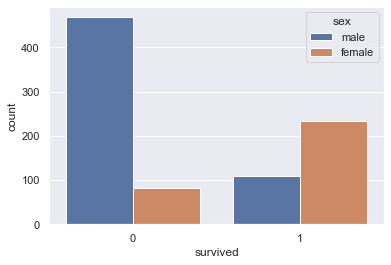

In [10]:
# import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='survived', hue='sex', data=titanic)

> ✔ 여자 승객이 더 높은 생존율을 가진 것을 확인할 수 있습니다. 

>이번에는 가설1인 아이들의 생존율을 확인해보겠습니다.  
(빨강색이 생존자 데이터)

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

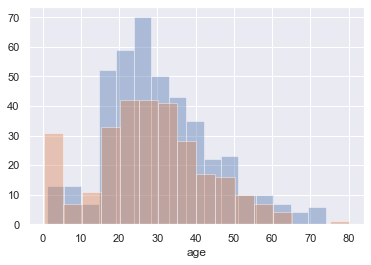

In [11]:
sns.distplot(titanic.age.loc[titanic['survived']==0],kde=False)
sns.distplot(titanic.age.loc[titanic['survived']==1],kde=False)

> `FacetGrid` 를 사용하면 여러 개의 그래프를 손쉽게 만들 수 있습니다 (위 그래프와 같음)

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


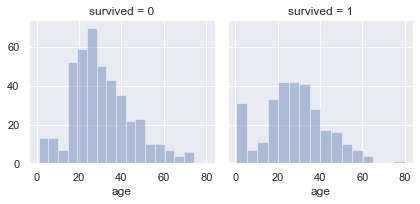

In [12]:
grid = sns.FacetGrid(titanic, col='survived')
grid.map(sns.distplot,'age', kde=False)

10세 미만의 아이들은 생존율이 매우 높은 것을 확인할 수 있습니다. 
또한 80세 이상의 노인도 생존율이 높습니다. 

대부분의 승객은 15 ~ 35세 사이인 것을 확인 할 수 있습니다. 

> 이번에는 `pclass` 와 `survived` 의 관계를 분석해 보겠습니다. 

C:\Users\min\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

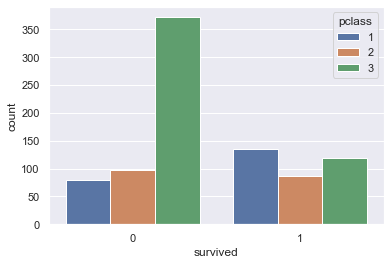

In [13]:
sns.countplot(titanic.survived, hue=titanic.pclass)    # sns(우선되는 기준 열, hue = 비교하려는 열) 

나이나 성별과는 관련이 있을까요?

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


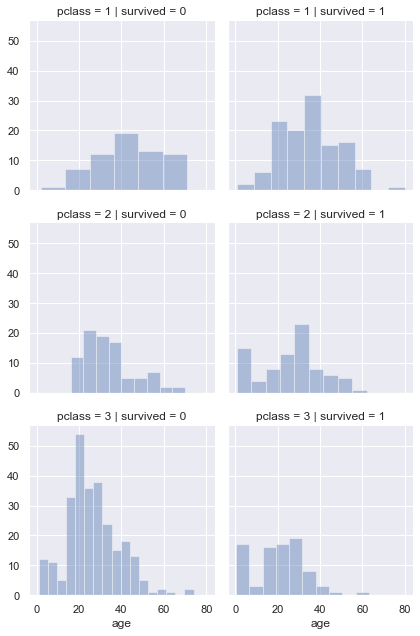

In [14]:
grid = sns.FacetGrid(titanic,col='survived',row='pclass')
grid.map(sns.distplot,'age',kde=False);

C:\Users\min\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


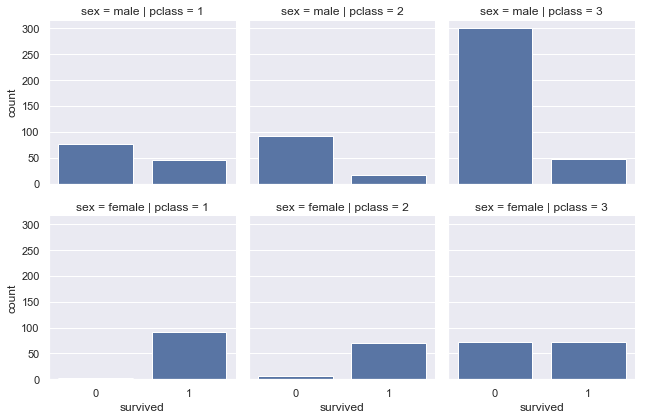

In [15]:
grid = sns.FacetGrid(titanic, col='pclass', row='sex');
grid.map(sns.countplot,'survived');
grid.add_legend()

[가설1] 여성 승객들은 생존율이 높은것을 확인할 수 있습니다.  
[가설2] 객실 등급이 높을 수록 생존율이 높은것을 확인 할 수 있습니다.   

## 📌Step.3 Missing data

`ticket` 의 값은 너무 다양하고 사용하기 힘들며 `cabin` 은 비어 있는 값이 많고, 

객실의 대략적 위치는 `pclass` 로 짐작할 수 있기 때문에 이 두 개의 값을 drop 하려고 합니다.
> `drop.([제거하려는 열 이름], axis = 행-0 열-1, inplace = True)`


In [16]:
# ticket 데이터 마지막으로 확인
titanic['ticket']

# A/5 21171 -> 21171/10 => 나머지

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: ticket, Length: 891, dtype: object

In [17]:
# cabin 데이터 마지막으로 확인
titanic['cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: cabin, Length: 891, dtype: object

In [18]:
titanic.drop(['ticket', 'cabin'], axis=1, inplace=True)    # 'inplace=True'를 해야만 실제 데이터셋에서 해당 열이 완전히 지워집니다
titanic

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### 🚁 Missing data 찾기  
값이 없는 데이터의 경우, 판다스 데이터프레임에서는 NAN 으로 표기하게 됩니다.  
>- NA = Not available  
- NAN = Not a number (판다스에서는 NA 를 NAN 으로 표기합니다) 

일반적으로 NAN 를 처리하는 방법은 3가지가 있습니다 .

1. **무시한다 ( 아무것도 하지 않음)** 
2. **제거한다 (drop)**
3. **다른 값으로 대체한다 (FILL)**

무시할 경우 분석을 할 때 걸리적거리고 모델에서 안 돌아가지 않기 때문에 2번(제거)와 3번(대체)를 배워보도록 하겠습니다.


In [19]:
import pandas as pd
import numpy as np    # NumPy는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리

# 예시 데이터 프레임  
df = pd.DataFrame([[1,2,np.nan],[3,np.nan,4],[np.nan,5,6],[np.nan,np.nan,np.nan]],columns=['a','b','c'])
df

,a,b,c
0,1.0,2.0,NaN
1,3.0,NaN,4.0
2,NaN,5.0,6.0
3,NaN,NaN,NaN


> 🗑제거(Drop) 하는 법 : 비어있는 값(NaN)이 너무 많을 경우, 전처리가 불가능한 경우 사용
> - `데이터프레임.dropna()`
- `데이터프레임.dropna(how='all')`

In [20]:
#nan 값이 있는 행을 다 지우기 

df.dropna()

,a,b,c


In [21]:
#모든 값이 nan 일때만 지우기

df.dropna(how='all') # how='any'

,a,b,c
0,1.0,2.0,NaN
1,3.0,NaN,4.0
2,NaN,5.0,6.0


> 🎨대치(Fill) 하는 법 : 비교적 비어있는 값(NaN)이 적고 해당 데이터가 유의미하여 이용할만한 경우 사용  
- `데이터프레임.fillna(0)`

In [22]:
#0 으로 대체

df.fillna(10)

,a,b,c
0,1.0,2.0,10.0
1,3.0,10.0,4.0
2,10.0,5.0,6.0
3,10.0,10.0,10.0


- 데이터는 정규분포를 따른다고 가정!

### 통계적으로 차이가 나지 않도록 **평균(mean)** 에 **분산(std)** 만큼 차이 나는 사이의 임의값을 넣어주기
>Age의 경우 `.drop()`을 사용해서 버리기에는 너무 중요한 값입니다.   
>그렇다고 일괄적으로 빈칸에 0 등의 값을 넣기에는 분석에 도움이 되지 않습니다.  
>그래서 이런 숫자 데이터에 일반적으로 **평균(mean)에 분산(std) 만큼 차이 나는 사이의 임의값을 넣어주게 됩니다**.  

> < ---- 데이터 ---- >  
- 평균 = 데이터의 중앙에 있을 확률이 높은 값  
- 분산 = 각 값이 평균에서 얼마만큼 분산되어있는지의 척도   

>그래서 평균에서 분산만큼 떨어진 값들 사이가 대략적으로 가장 확률이 높은 곳이라고 볼 수 있습니다.  
> `분산  ~ 평균() ~ 분산 `


> ✋ 잠깐 그럼 왜 모두 평균값으로 대체하지 않는 것인가요?  
>> 👉 평균값으로 대체하게 되면, 전체 데이터의 평균은 맞춰줄 수 있지만, 분산이 영향을 많이 받게 됩니다.

예를 들면 :

[1, 2, 5, 6 , 9, 10] 이라는 점수들의 평균은 5.5 입니다.

missing value 가 3개 있어서 이것을 만약 대체해 준다면, 

[1, 2, 5, 5.5 , 5.5, 6, 9, 10] 이 됩니다. 

이렇게 되면 기존의 갖고 있던 분포와 매우 다르게 됩니다. 

아래의 예제에서 평탄한 산 모양의 고른 분포를 가진 그래프가, 
중간 부분만 볼록 튀어나오게 되는 것을 볼 수 있습니다. 

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

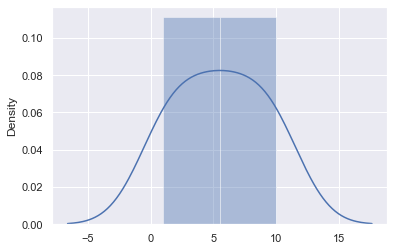

In [23]:
l = [1, 2, 5, 6 , 9, 10]

sns.distplot(l)

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

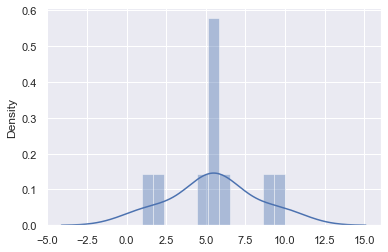

In [24]:
l = [1, 2, 5, 5.5, 5.5, 5.5, 5.5, 6, 9, 10] 

sns.distplot(l)

그러나 임의값을 넣어주게 된다면?
- `np.std()`
- `np.mean()`
- `np.random.unifrom()`
- `.extend()`

C:\Users\min\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

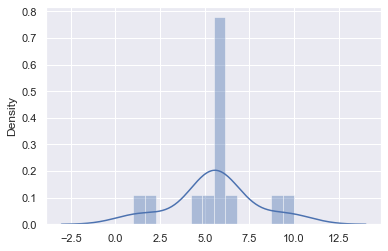

In [25]:
import numpy as np

std = np.std(l)    # np를 이용해 std 계산, 약 2.8 
mean = np.mean(l)  # np를 이용한 mean 게산, 약 5.6 

rand_value = np.random.uniform(mean - std, mean + std, 4) # mean 에서 std 만큼 떨어져 있는 랜덤한 값들을 size 만큼 반환

l.extend(rand_value)    # 리스트를 더해줍니다

sns.distplot(l)

> 처음과 비슷한 분포가 나오는 것을 볼 수 있습니다.

만약 숫자가 더 커진다면 더 그러한 경향이 더욱 심해집니다.

In [26]:
#nan 값이 있는지 없는지 확인
df.isna() 

,a,b,c
0,False,False,True
1,False,True,False
2,True,False,False
3,True,True,True


In [27]:
#총 nan 값이 몇개인지 확인
df.isna().sum() 

a    2
b    2
c    2
dtype: int64

> `np.random.randint(최소, 최대, 갯수)` : 랜덤하게 생성된 숫자들을 조건에 맞게 list 형태로 반환해주는 함수


In [28]:
# 0에서 10 사이의 랜덤한 숫자 4개를 만들어보시오.
np.random.randint(0,10,4)

array([5, 8, 1, 0])

In [29]:
import numpy as np

mean = titanic['age'].mean()       # age 의 mean 값을 구함
std = titanic['age'].std()         # age 의 std 값을 구함
size = titanic['age'].isna().sum() # age 에 nan 값이 몇개인지를 구함 


rand_age = np.random.randint(mean - std, mean + std, size = size) # mean 에서 std 만큼 떨어져 있는 랜덤한 값들을 size 만큼 반환

print(rand_age)

[43 19 36 37 18 25 15 36 30 34 35 29 19 22 19 28 15 17 32 43 42 25 33 16
 26 22 22 23 36 41 30 34 38 22 34 33 22 37 15 20 18 41 16 43 34 29 22 15
 22 38 32 25 17 29 25 24 19 21 18 31 27 31 36 41 29 36 32 41 37 33 25 27
 21 35 22 18 21 15 32 16 27 25 28 38 36 22 39 16 29 30 36 20 30 26 43 18
 41 34 36 36 28 41 28 33 27 32 29 32 28 23 43 17 22 20 20 27 21 34 16 32
 16 23 40 15 18 33 30 18 29 36 34 20 40 40 34 34 22 36 40 18 23 16 40 43
 38 17 28 25 28 17 41 17 17 42 15 28 31 30 26 27 42 32 21 41 20 19 34 37
 28 27 40 18 18 19 34 39 27]


> 이제 `titanic['age']` 의 비여있는 값을 rand_age 로 대체해줍니다. 

In [30]:
# 기존 'age'열 중 비어있는 값에 rand_age에 들어있는 값을 차례로 넣기
titanic['age'].loc[titanic['age'].isna()] = rand_age

# 아직도 'age'에 nan 값이 있을까요? 확인해봅시다!
titanic.isna().sum()

C:\Users\min\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

> `embarked` 의 경우 2개만 없기 때문에, 가장 흔한 값인 'S' 로 대체해주는 방법을 사용했습니다.
- 889개의 데이터에 3종류의 값이 들어가 있음
- 가장 많은 것은 'S'
- 'S'는 총 644개

In [31]:
titanic['embarked'].describe()    

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [32]:
titanic['embarked'].fillna('S',inplace=True)    # 'S'로 대체
titanic['embarked'].isna().sum()    #'embarked 열에서 NaN의 개수

0

In [33]:
# classification: number of classes!!!!!!!!!!
# binary classfication: class가 2개 (1/2)
# multi-label classification: class가 복수개 (1/n)
# 각 클래스별로 데이터 보유량 -> 1: 100000 2: 100 -> imbalanced classification(데이터 불균형) -> ???

## 📌Step4. 🔬Feature Engineering 


#### for문을 이용해서 일일이 손보기

> 아래의 코드는 titanic 의 이름에서 '.' 앞에 붙는 단어를 가져와 title 에 저장하는 방법입니다.  
- `Braund, Mr. Owen Harris` 에서 '`Mr`' 만 추출하기!
- `.split('기준')`

In [34]:
name = "Braund, Mr. Owen Harris"

print(name) # 이름을 ' ' 띄어쓰기를 기준으로 분리 하여 리스트로 반환
# 예) "Bround, Mr. Owne Harris" -> [Bround, Mr., Owne, Harris]

Braund, Mr. Owen Harris


In [35]:
for item in name.split(' '):    # 변환된 리스트의 원소를 item이라는 임시 변수에 하나씩 넣으면서 루프가 돌아감
  if '.' in item:               # 분리한 리스트에서 . 이 있으면
    print(item)                 # 출력
    print(item[:-1])            # .도 없애주기(1강 리스트 slicing 참고)

Mr.
Mr


위의 작업을 모든 데이터에 적용하려면 for문을 두 번 사용해야 해서 코드도 길어지고, 시간도 오래 걸립니다.  

<br/>

#### 정규표현식 사용하기

그러나 **정규표현식(正規表現式, Regular Expression)**을 이용하면 한줄로 가능합니다.  

정규표현식이란? 문자열을 처리하는 방법의 하나로 특정한 조건의 문자를 

'검색'하거나 '치환'하는 과정을 매우 간편하게 처리 할 수 있도록 하는 수단입니다. 

> `str.extract()` : 판다스 내장함수. 열 안에서 ()안 조건에 부합하는 string을 추출  
> `' ([A-Za-z]+)\.'` : 기존 string 중에서 ' '(스페이스바)로 시작해 '.'로 끝나는  
하나 이상의 알파벳(대문자 A 부터 소문자 z 까지)을 가져오는 정규표현식입니다  

In [36]:
titanic['name'].str.extract(' ([A-Za-z]+)\.', expand=False)     # 정규표현식이란? '개념'만 알고 넘어갑시다

# Mr. Mrs. Miss. Ms., Ab. Bc.

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

> 정규표현식으로 직위(Mr, Mrs, Miss 등)를 추출해서 기존 데이터셋에 'title'이라는 이름의 열 추가하기

In [37]:
for data in titanic:
  titanic['Title'] = titanic['name'].str.extract(' ([A-Za-z]+)\.', expand=False)    
titanic    # title이라고 새로 생기는 열을 주목해봅시다!

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


> 새로 추가된 'title'이라는 열에는 총 17 종류의 데이터가 들어가 있으며 'Mr'가 제일 많은 것을 알 수 있습니다.

In [38]:
titanic.describe(include=['O'])

,name,sex,embarked,Title
count,891,891,891,891
unique,891,2,3,17
top,"Danoff, Mr. Yoto",male,S,Mr
freq,1,577,646,517


#### `cut()` 을 이용한 구간 설정

마케팅 직군에서도 고객을 분석할 때 보통 10대, 20대, 30대 등 이런 식으로 연령대 구분을 많이 하죠?  
마찬가지로 데이터 분석에서도 나이가 11인지 12인지 보다는 10대인지 20대인지 이런 식으로 구간을 설정하여 보는 것이   
더 정확하고, 성능을 좋게 내는 경우가 있습니다.

> 🔍 우리도 `pd.cut()` 함수를 이용하여 나이를 5개의 구간으로 잘라보겠습니다. 


In [39]:
import pandas as pd
import seaborn as sns
titanic['age_band'] = pd.cut(titanic['age'], 5)    #5개의 구간으로 잘라, ageband 라는 새로운 열 생성
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,Title,age_band
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,"(32.252, 48.168]"


구간으로 나눈 게 의미가 있을까요? 한번 **🗒pivot table** 을 이용해서 알아봅시다  
> - **🗒pivot table**이란?  

<img src = "https://cdn.lynda.com/course/114891/114891-636216267723725186-16x9.jpg" width = "800">

 커다란 표의 데이터를 요약하는 통계표입니다. 이 요약에는 합계, 평균, 기타 통계가 포함될 수 있으며 피벗 테이블이 이들을 함께 
 
 의미 있는 방식으로 묶어줍니다. 이는 유용한 정보에 집중할 수 있도록 하기 위해 통계를 정렬 또는 재정렬(피벗)합니다.  

> - `pd.pivot_table()`

In [40]:
#각 age_band 별로 평균 survived 가 어느 정도인지 보여주는 피벗 테이블 
pd.pivot_table(titanic, values='survived', columns='age_band')

age_band,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80.0]"
survived,0.535088,0.346756,0.38,0.434783,0.090909


나이 구간에 따라서 생존율이 유의미하게 차이 나는 것을 볼 수 있습니다.   

> 🔍연습 : 아래의 공간에 각 title 별로 생존율을 보여주는 피벗 테이블을 만들어보세요 

In [41]:
# 여기에
pd.pivot_table(titanic, values='survived', columns='Title')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
survived,0.0,0.5,1.0,0.0,0.428571,0.0,1.0,0.5,0.575,0.697802,1.0,1.0,0.156673,0.792,1.0,0.0,1.0


> age_band열을 drop해주기 위해서, 나눈 범위를 토대로 age 열의 값들을 0에서 4로 바꿔줍니다.
> - `0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'`

In [42]:
titanic.loc[titanic['age'] <= 16, 'age'] = 0
titanic.loc[(titanic['age'] > 16) & (titanic['age'] <= 32), 'age'] = 1
titanic.loc[(titanic['age'] > 32) & (titanic['age'] <= 48), 'age'] = 2
titanic.loc[(titanic['age'] > 48) & (titanic['age'] <= 64), 'age'] = 3
titanic.loc[ titanic['age'] > 64, 'age'] = 4
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,Title,age_band
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,S,Mr,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,C,Mrs,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,S,Miss,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,S,Mrs,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,S,Mr,"(32.252, 48.168]"


> 🔍`age_band` 를 드랍하세요.

In [43]:
#여기에
titanic.drop(['age_band'],axis=1,inplace=True) 

⭐두 개 이상의 feature 를 조합하여 새로운 feature 를 만들 수도 있습니다 ⭐

예를 들면, `sibsp` 와 `parch` 를 합쳐서 solo 라는 항목을 만들 수 있습니다.  

혼자 왔다면 `solo = 1`, 아니라면 `solo = 0` 을 만들어 줍시다. 

In [44]:
titanic['solo'] = titanic['sibsp'] + titanic['parch'] == 0    # 혼자이면 True를 반환, 누군가와 함께 왔으면 False를 반환
titanic['solo'] = titanic['solo'].astype(int)    # .astype()은 데이터셋 또는 데이터셋의 특정 열의 데이터 타입을 바꿔줍니다
titanic.head()                                   # int는 파이썬에서 정수 타입을 의미, float과 반대

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,Title,solo
0,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,S,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,C,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,S,Mrs,0
4,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,S,Mr,1


In [45]:
# 참고 : True 값은 숫자로 1, False는 숫자로 0 입니다.
num_True = True + 2
num_False = False + 2
print(num_True)
print(num_False)

3
2


> 이제 필요 없는 항목인 `sibsp` 와  `parch`를 `drop()` 하세요

In [46]:
titanic.drop(['sibsp','parch'],axis=1,inplace=True)
titanic

,survived,pclass,name,sex,age,fare,embarked,Title,solo
0,0,3,"Braund, Mr. Owen Harris",male,1.0,7.2500,S,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,71.2833,C,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",female,1.0,7.9250,S,Miss,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,53.1000,S,Mrs,0
4,0,3,"Allen, Mr. William Henry",male,2.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,1.0,13.0000,S,Rev,1
887,1,1,"Graham, Miss. Margaret Edith",female,1.0,30.0000,S,Miss,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,23.4500,S,Miss,0
889,1,1,"Behr, Mr. Karl Howell",male,1.0,30.0000,C,Mr,1


## 📌step5. 데이터 검수

> 모든 항목이 numeric 한지 마지막으로 확인해 봅시다. 
- `데이터셋.info()` 

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   fare      891 non-null    float64
 6   embarked  891 non-null    object 
 7   Title     891 non-null    object 
 8   solo      891 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 59.3+ KB


> `fare` 는 소수점 5자리 까지 쓰고 있는데, 
이것을 int 로 바꿔서 소수점을 버리겠습니다. 


In [48]:
titanic['fare'] = titanic['fare'].astype(int)     # float에서 int로 바꿔줍니다
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   fare      891 non-null    int32  
 6   embarked  891 non-null    object 
 7   Title     891 non-null    object 
 8   solo      891 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 55.8+ KB


> 🔍 마찬가지로 `age` 항목도 int 로 변환해 보세요.



In [49]:
#여기에
titanic['age'] = titanic['age'].astype(int) 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  891 non-null    int64 
 1   pclass    891 non-null    int64 
 2   name      891 non-null    object
 3   sex       891 non-null    object
 4   age       891 non-null    int32 
 5   fare      891 non-null    int32 
 6   embarked  891 non-null    object
 7   Title     891 non-null    object
 8   solo      891 non-null    int32 
dtypes: int32(3), int64(2), object(4)
memory usage: 52.3+ KB


> 🔍 `map` 또는 `labelencoder` 을 이용해 title 을 numerical 하게 바꾼 후에, name 항목을 drop 하기
 - ① 먼저 title 안에 어떤 값이 있는지 확인 - `데이터셋.title.unique()`
 - ② 중복되는 표현을 통일 - `데이터열.replace('이전', '이후')`
 - ③ numerical 데이터로 인코딩
 - ④ name 항목 드랍

In [50]:
# ① title 안에 어떤 값들이 있는지 확인
titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [51]:
# ② 중복되는 표현 통일
# 개체수가 적은 것들은 Other로 통일 / Mlle과 Miss / Mme과 Mrs / Ms와 Miss
titanic['Title'] = titanic['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')

In [52]:
titanic.Title.unique() # 이제 다시 한번 어떤 값들이 있는지 확인

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

> 😱 이제 title 열 안에 5 종류의 값밖에 남아있지 않을 것을 확인할 수 있을 것입니다

In [53]:
# ③ numerical 데이터로 인코딩(LabelEncoder 사용)
from sklearn.preprocessing import LabelEncoder    # LabelEncoder를 불러오기
encoder = LabelEncoder()      # encoder라는 변수를 선언
encoder.fit(titanic['Title']) # title 열에 맞게 인코딩
titanic['Title'] = encoder.transform(titanic['Title']) # 인코딩 결과를 실제 행에 적용
titanic.head()

,survived,pclass,name,sex,age,fare,embarked,Title,solo
0,0,3,"Braund, Mr. Owen Harris",male,1,7,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,71,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,1,7,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,53,S,3,0
4,0,3,"Allen, Mr. William Henry",male,2,8,S,2,1


In [54]:
# ④ name 항목 드랍
titanic.drop('name',axis=1,inplace=True)
titanic.head()

,survived,pclass,sex,age,fare,embarked,Title,solo
0,0,3,male,1,7,S,2,0
1,1,1,female,2,71,C,3,0
2,1,3,female,1,7,S,1,1
3,1,1,female,2,53,S,3,0
4,0,3,male,2,8,S,2,1


In [55]:
# inverse transform 을 이용하면 역으로 원래 문자열 데이터를 알 수 있습니다. 
encoder.inverse_transform([3])

array(['Mrs'], dtype=object)

> 🔍 `sex` 항목도 numeric 으로 변환해주세요

In [56]:
# map 함수 사용
genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)
titanic.head()

# pandas apply lambda

,survived,pclass,sex,age,fare,embarked,Title,solo
0,0,3,0,1,7,S,2,0
1,1,1,1,2,71,C,3,0
2,1,3,1,1,7,S,1,1
3,1,1,1,2,53,S,3,0
4,0,3,0,2,8,S,2,1


> 🔍`embarked` 항목도 변환해보겠습니다

In [57]:
# 여기에
titanic['embarked'] = titanic['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)    # 소숫점 자리가 나오지 않게 .astype(int)를 사용

In [58]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,Title,solo
0,0,3,0,1,7,0,2,0
1,1,1,1,2,71,1,3,0
2,1,3,1,1,7,0,1,1
3,1,1,1,2,53,0,3,0
4,0,3,0,2,8,0,2,1


## 📌Step6. scikit-learn 모델로 성능 검증하기 

데이터 전처리와 모델에 사용하기 위해서 각종 전처리 방법을 배우고 실습해 보았습니다. 

실제 전처리가 모델에 성능에 어떤 영향을 미치는지 확인해 봅시다.

`scores(x,y)` 함수는 x 에 features 를, y 에 예측하고자 하는 output 을 넣어주면
4개의 모델 

**logistic regression, SVM, KNN, Random Forest** 로 훈련한 정확도를 보여줍니다. 

위의 모델에 대해서 일부를 나중에 더 자세히 배우고, 현재는 이 `scores()` 함수를 이용해 타이타닉 데이터셋에 대하여 

어느 정도의 성능이 나오는지만 확인해 보겠습니다.  






> 📂필요한 패키지 불러오기

In [59]:
# 4강에서 배울 모델들이 포함되어있습니다. 일단 실행만 시켜줍니다!
from sklearn.linear_model import LogisticRegression    # 
from sklearn.model_selection import train_test_split   # 데이터 분리를 위한 함수

> 🔎 `max_iter` 는 무엇인가요? 

`max_iter`는 기본적으로 100으로 세팅되어있습니다.

이것은 `model.fit` 에서 피팅 시에 최대 시도 횟수를 뜻합니다. 100 이면 최대 100번 시도 하는 것이고,  
1000이면 최대 1000번시도합니다.

이 경우에 데이터가 복잡해서 100번을 기본세팅으로 하면 `model.fit` 이 실행되지 않습니다. 

In [60]:
x = titanic[['pclass','sex','age','fare', 'embarked','solo','Title']]
y = titanic[['survived']]

print(x)
print(y)

     pclass  sex  age  fare  embarked  solo  Title
0         3    0    1     7         0     0      2
1         1    1    2    71         1     0      3
2         3    1    1     7         0     1      1
3         1    1    2    53         0     0      3
4         3    0    2     8         0     1      2
..      ...  ...  ...   ...       ...   ...    ...
886       2    0    1    13         0     1      4
887       1    1    1    30         0     1      1
888       3    1    1    23         0     0      1
889       1    0    1    30         1     1      2
890       3    0    1     7         2     1      2

[891 rows x 7 columns]
     survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [61]:
model = LogisticRegression(max_iter=1000)   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train,y_train)
Y_pred = model.predict(x_test)
print('---'*5 + 'train_test_split 20/80')
print('Logistic Regression' , round(model.score(x_train, y_train) * 100, 2))
print('---'*5)

---------------train_test_split 20/80
Logistic Regression 79.21
---------------


C:\Users\min\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [62]:
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7821229050279329